In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
pd.DataFrame(boston.data, columns=boston.feature_names)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [2]:
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs = train_test_split(boston.data, boston.target, test_size=0.2)
pd.DataFrame(train_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60
1,0.10793,0.0,8.56,0.0,0.5200,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
2,0.34006,0.0,21.89,0.0,0.6240,6.458,98.9,2.1185,4.0,437.0,21.2,395.04,12.60
3,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
4,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43
5,0.19539,0.0,10.81,0.0,0.4130,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
6,0.17783,0.0,9.69,0.0,0.5850,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
7,0.34940,0.0,9.90,0.0,0.5440,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
8,0.49298,0.0,9.90,0.0,0.5440,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54
9,0.04294,28.0,15.04,0.0,0.4640,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59


In [3]:
pd.DataFrame(test_data_bs, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8.0,284.0,19.7,378.08,14.44
1,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,9.68
2,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
3,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37
4,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
5,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
6,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29
7,0.19186,0.0,7.38,0.0,0.493,6.431,14.7,5.4159,5.0,287.0,19.6,393.68,5.08
8,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50
9,0.79041,0.0,9.90,0.0,0.544,6.122,52.8,2.6403,4.0,304.0,18.4,396.90,5.98


In [4]:
pd.DataFrame(train_labels_bs)

,0
0,11.3
1,21.7
2,19.2
3,19.4
4,17.1
5,23.4
6,17.5
7,20.3
8,22.8
9,20.6


In [5]:
pd.DataFrame(test_labels_bs)

,0
0,16.0
1,18.9
2,14.0
3,17.9
4,21.2
5,20.2
6,18.7
7,24.6
8,17.6
9,22.1


In [9]:
forest = RandomForestRegressor()
forest.fit(train_data_bs, train_labels_bs)

train_labels_pred = forest.predict(train_data_bs)
test_labels_pred = forest.predict(test_data_bs)
pd.DataFrame(train_labels_pred)

,0
0,12.72
1,21.48
2,18.85
3,19.88
4,18.50
5,23.45
6,18.25
7,20.73
8,25.12
9,21.43


In [10]:
pd.DataFrame(test_labels_pred)

,0
0,18.94
1,21.30
2,15.06
3,12.69
4,20.95
5,18.35
6,19.65
7,25.23
8,17.91
9,25.17


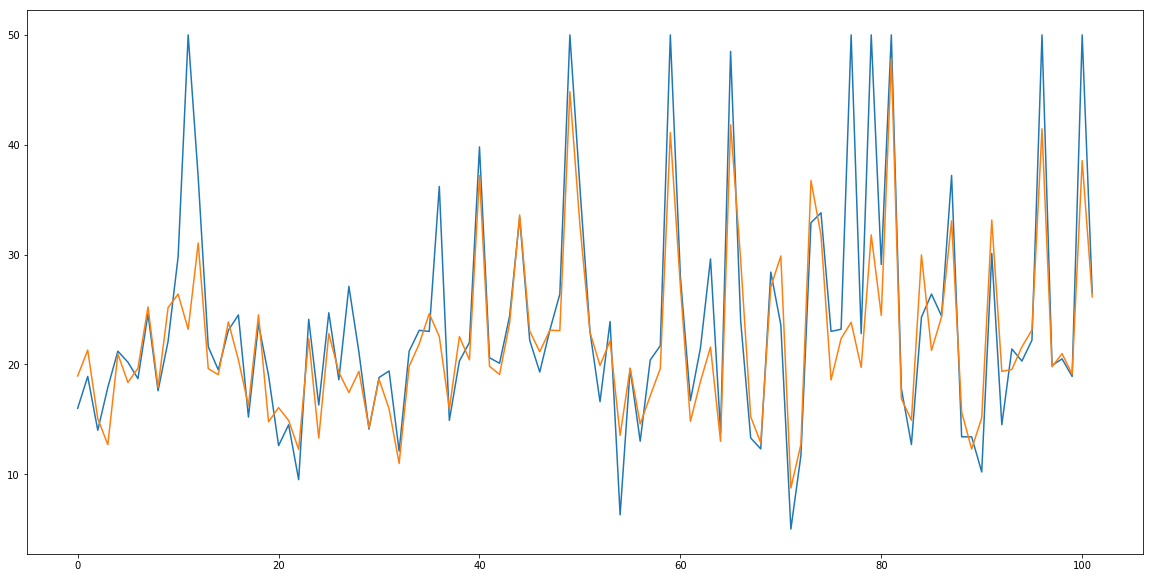

In [13]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(test_labels_pred, label="predicted")
